# Regression Analysis on Diamond Dataset

---

Author: [Mo Gutale](https://github.com/mgutale)

<img src="https://media.giphy.com/media/eHvd40K8OfCRRLB3t5/giphy.gif" width="950" height="280" />

---

## Brief Outline 

Businesses often nowadays require to predict prices of products based on a various product attributes and along with other methods in order to ensure that products are priced correctly. This notebook will aim to solve this business problem using the famous diamond dataset. By the end of this notebook, i am expecting to have a model that can be used by business to deploy in a real world scenario. 

## Dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. The source of this dataset can be found [here.](https://www.kaggle.com/datasets/shivam2503/diamonds) 

Features include:

- price in US dollars - Target
- carat weight of the diamond 
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- depth (43-79)
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)

The last three variables represent the dimension of the the particular observation(diamond).

---

## Table of Content

1. Data Load & Quick Look 
2. Explore, Clean & Transform 
3. Feature Selection and Preprocessing
4. Model Training 
5. HyperTunning the Model
6. Feature Importance
7. Prediction on Test & Confidence Interval
8. Save Model 
9. Prediction on Validation set
10. Conclusion 



---



## 1. Data Load & Quick Look

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import time
warnings.filterwarnings('ignore')

# Read the file 
file_path = 'dataset/diamonds.csv'
df = pd.read_csv(os.path.join(os.getcwd(), file_path))

# Quick look at a random sample of 10
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53237,53238,0.72,Ideal,H,VS1,61.6,59.0,2642,5.75,5.78,3.55
13039,13040,0.36,Ideal,F,SI1,61.5,56.0,600,4.59,4.62,2.83
29728,29729,0.31,Very Good,G,VVS2,62.9,58.0,707,4.28,4.30,2.70
30120,30121,0.32,Premium,G,VS2,60.7,58.0,720,4.42,4.38,2.67
32482,32483,0.30,Ideal,G,VS1,61.8,56.0,795,4.32,4.35,2.68
5259,5260,0.80,Ideal,F,VS1,61.2,56.0,3793,6.01,5.98,3.67
11700,11701,0.34,Premium,E,SI1,60.7,60.0,596,4.48,4.51,2.73
29037,29038,0.40,Good,E,SI1,63.8,56.0,687,4.70,4.74,3.01
42827,42828,0.51,Ideal,E,SI1,60.9,54.0,1355,5.17,5.21,3.16
28925,28926,0.30,Ideal,G,VVS2,61.5,55.0,684,4.30,4.32,2.65


In [ ]:
df.info() # view the data structure and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe(include = 'all') # include the categoricals in the stats

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


**Notes** <br>
9 variables excluding column one which is an index and target column price and 53940 observations.  Cut, Color and Clarity are categoricals and others are numerical. There seems to be no missing values. 



---



## 2. Explore, Clean & Transform

In [ ]:
# Remove column 1 as its not necessary 
df.drop(df.columns[0], axis = 1, inplace = True)

In [ ]:
# set aside 20% for validation set
validation_set = df.sample(frac = 0.2)
diamond = df[~df.index.isin(validation_set.index)]

# Save the dataset
validation_set.to_csv("dataset/validation_set.csv")

#### 2.0 Univariate Analysis on Price

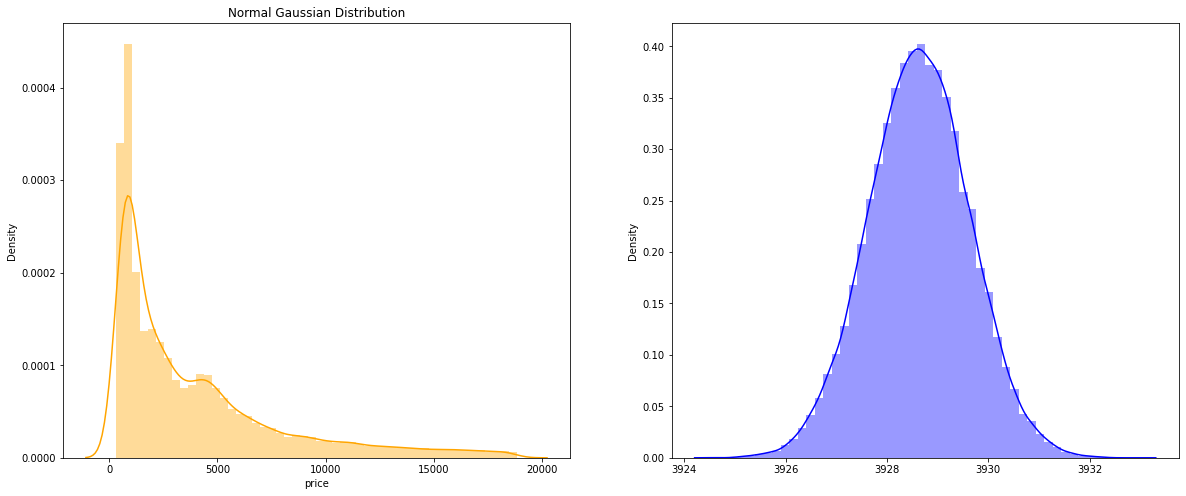

In [ ]:
# plot the distribution of Target price and KDE on top as well as Gaussian distribution of sample with the same mean Price for comparison
sample = np.random.normal(loc = diamond.price.mean(),size = diamond.shape[0])
fig, axes = plt.subplots(ncols =2)
plt.rcParams["figure.figsize"] = [20,8]
g = sns.distplot(diamond.price, color = 'orange', ax = axes[0])
g.set_title('Distribution of Diamond Price')
h = sns.distplot(sample, color = 'blue', ax = axes[1])
g.set_title('Normal Gaussian Distribution')
plt.show()

In [ ]:
# Calculate Statistics 
print(f"Mean: {diamond.price.mean():.2f}")
print(f"Median: {diamond.price.median():.2f}")
print(f"Standard Deviation: {diamond.price.std():.2f}")
print(f"Skew is: {diamond.price.skew():.2f}")
print(f"Kurtosis is: {diamond.price.kurtosis():.2f}")

Mean: 3928.63
Median: 2416.00
Standard Deviation: 3971.33
Skew is: 1.62
Kurtosis is: 2.19


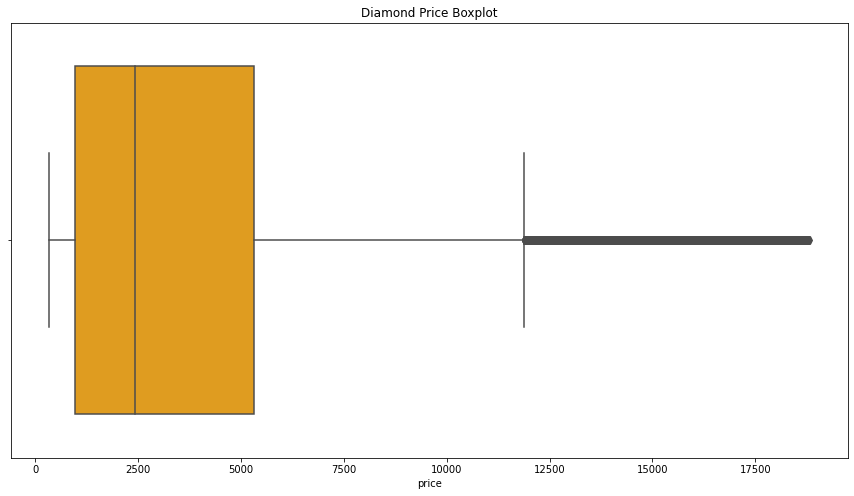

In [ ]:
# display boxplot of the price
plt.figure(figsize = (15,8))
sns.boxplot(diamond.price, color = 'orange')
plt.title("Diamond Price Boxplot")
plt.show()

In [ ]:
# quantify the % of outliers before 1.5IQR + Q3.  
Q1 = diamond.price.quantile(0.25)
Q3 = diamond.price.quantile(0.75)
IQR = Q3 - Q1
high_outlier_threshold = Q3 + (1.5 * IQR)
perc_outliers = diamond.query(f"price > {high_outlier_threshold}").shape[0] / diamond.shape[0]
print(f"Percentage of outliers in dataset is: {perc_outliers *100:.2f}")

Percentage of outliers in dataset is: 6.47


**Notes** <br>
Looking at the distplot the price of diamond is positively skewed at 1.20 with Platykurtic kurtosis at 0.85 when compared to the Gaussian Distribution to the right.  This means that the mean of the data is greater than the median and median is the greater than the mode.  Boxplot also shows that 7% of the data is considered an outlier as they are 1.5IQR from the Q3. In this case, i will remove the extreme outliers at this stage. 

In [ ]:
#drop extreme outliers calculated earlier
diamond.drop(diamond.query(f"price > {high_outlier_threshold}").index, inplace =True)

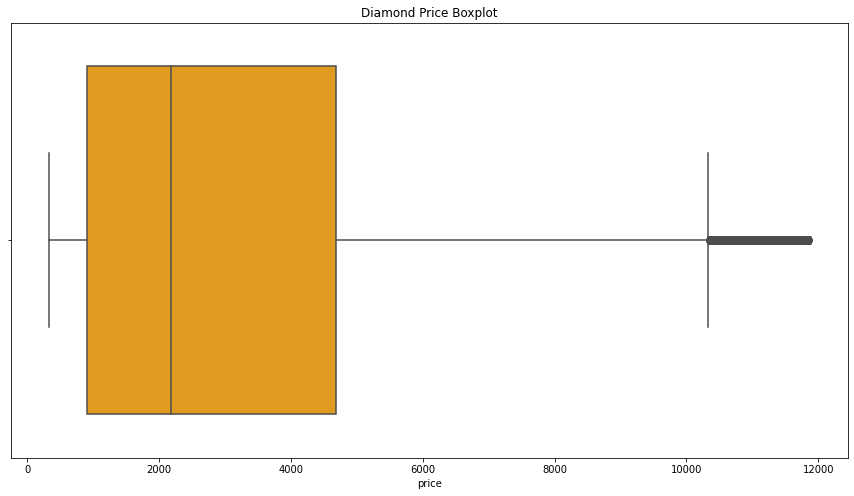

In [ ]:
# display boxplot of the price with extreme outlier removed
plt.figure(figsize = (15,8))
sns.boxplot(diamond.price, color = 'orange')
plt.title("Diamond Price Boxplot")
plt.show()

#### 2.2 Bivariate Analysis on Price

In [ ]:
# list of variables
diamond.columns.tolist()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

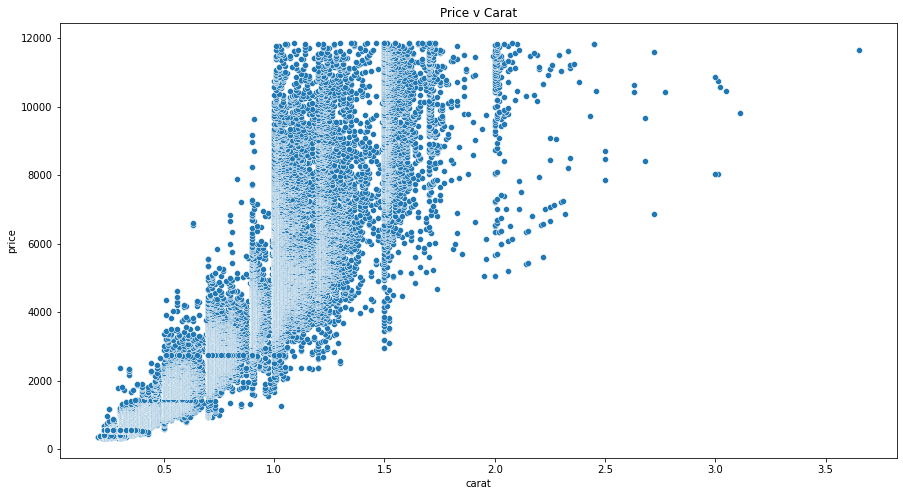

In [ ]:
# Relationship between target and Carat 
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.carat, diamond.price)
plt.title("Price v Carat")
plt.show()

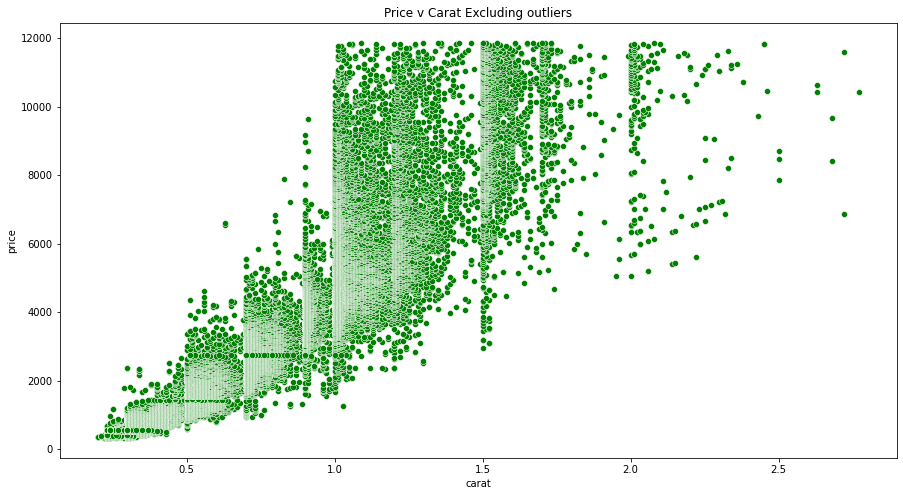

In [ ]:
# Treat by removing outlier greater than 3
diamond = diamond[diamond.carat < 3]

# Relationship between target and Carat 
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.carat, diamond.price, color = 'green')
plt.title("Price v Carat Excluding outliers")
plt.show()

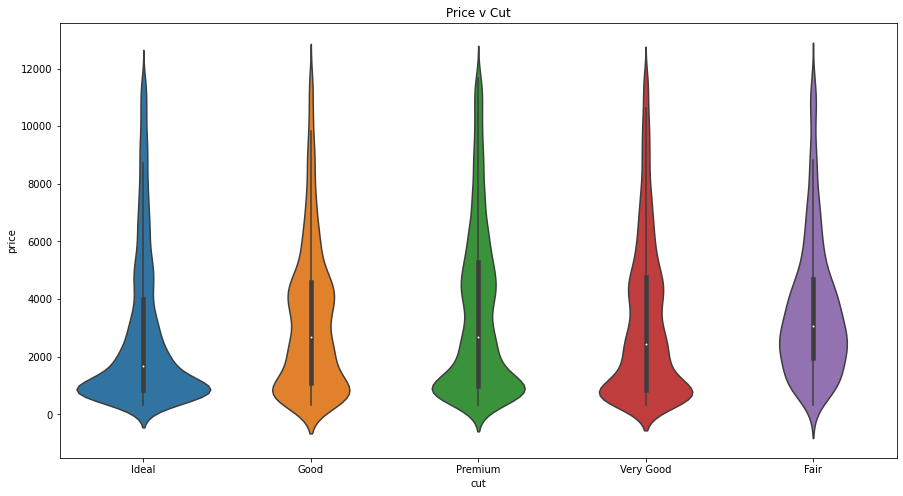

In [ ]:
# Relationship between target and Cut 
plt.figure(figsize = (15,8))
sns.violinplot(diamond.cut, diamond.price)
plt.title("Price v Cut")
plt.show()

**Notes**<br>
Above violinplot shows that Ideal cut diamond are selling the most in low prices while Fair cut diamonds are selling all round. Good, premium and Very good seem to have identical price distributions with Premium selling more in the higher end prices.  

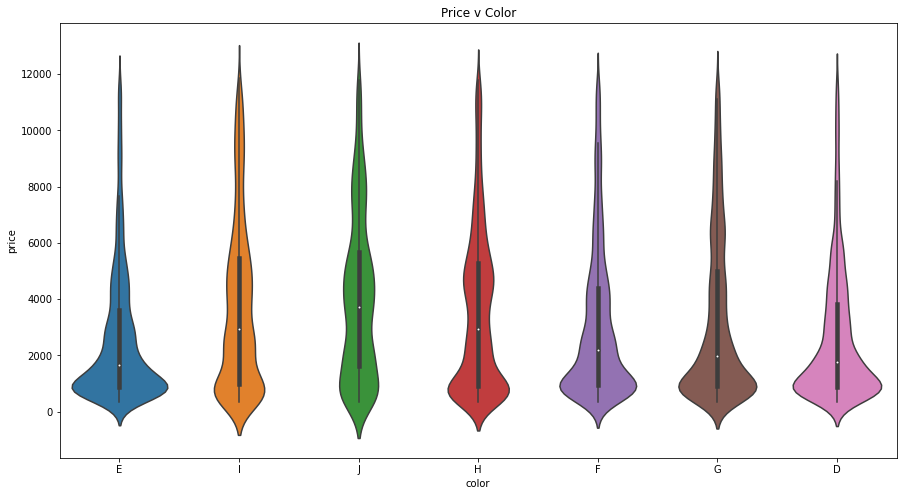

In [ ]:
# Relationship between target and Color 
plt.figure(figsize = (15,8))
sns.violinplot(diamond.color, diamond.price)
plt.title("Price v Color")
plt.show()

**Notes**<br>
in terms of Color J is the worst color however seems to be selling the least and D is the best follows closely with E to those prices in the lower end in terms of volume.  


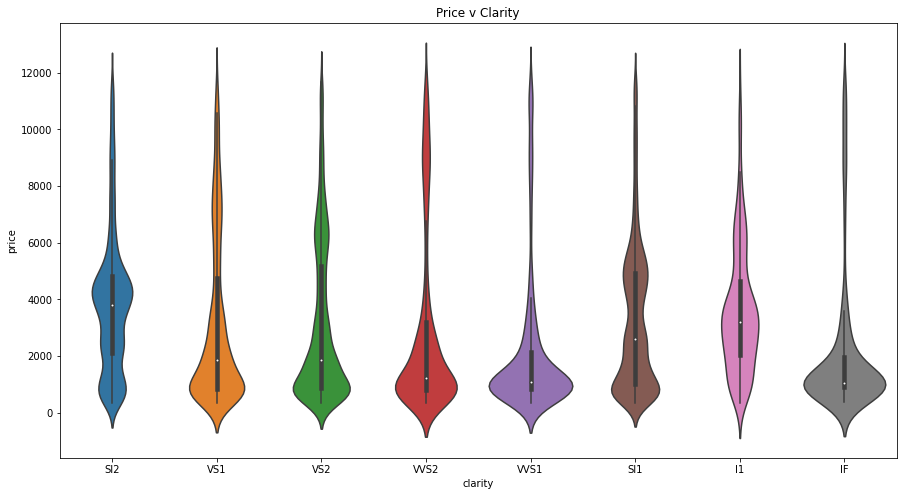

In [ ]:
# Relationship between target and Clarity 
plt.figure(figsize = (15,8))
sns.violinplot(diamond.clarity, diamond.price)
plt.title("Price v Clarity")
plt.show()

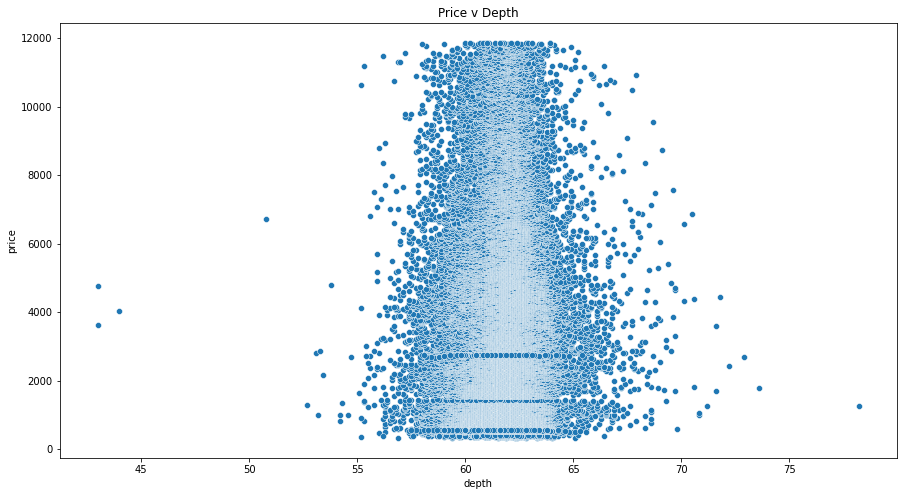

In [ ]:
# Relationship between target and Depth
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.depth, diamond.price)
plt.title("Price v Depth")
plt.show()

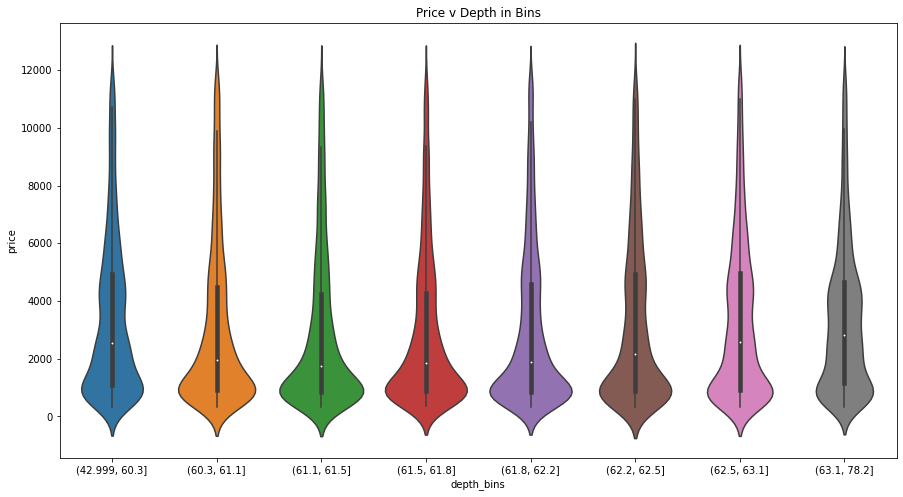

In [ ]:
# Diamond Depth column is very dense with alot of noise so i will create bins and change to categories of 8 bins
diamond['depth_bins']=pd.qcut(diamond.depth, q=8)

plt.figure(figsize = (15,8))
sns.violinplot(diamond.depth_bins, diamond.price)
plt.title("Price v Depth in Bins")
plt.show()

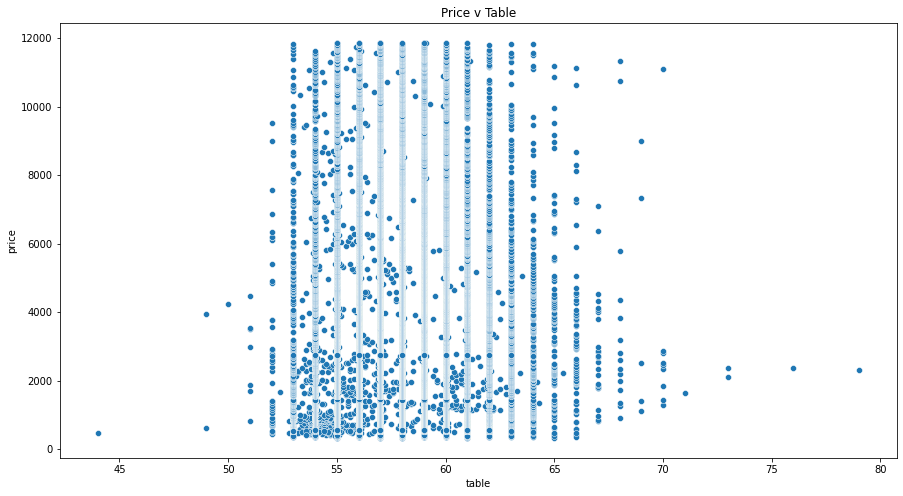

In [ ]:
# Relationship between target and Table
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.table, diamond.price)
plt.title("Price v Table")
plt.show()

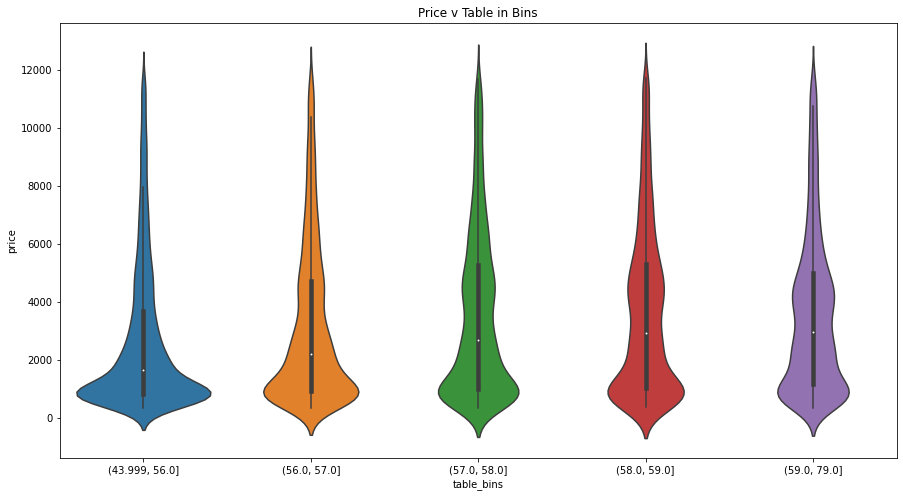

In [ ]:
# Same as above anothe noisy column, i will create 5 bins in this case 
diamond['table_bins']=pd.qcut(diamond.table, q=5)

plt.figure(figsize = (15,8))
sns.violinplot(diamond.table_bins, diamond.price)
plt.title("Price v Table in Bins")
plt.show()

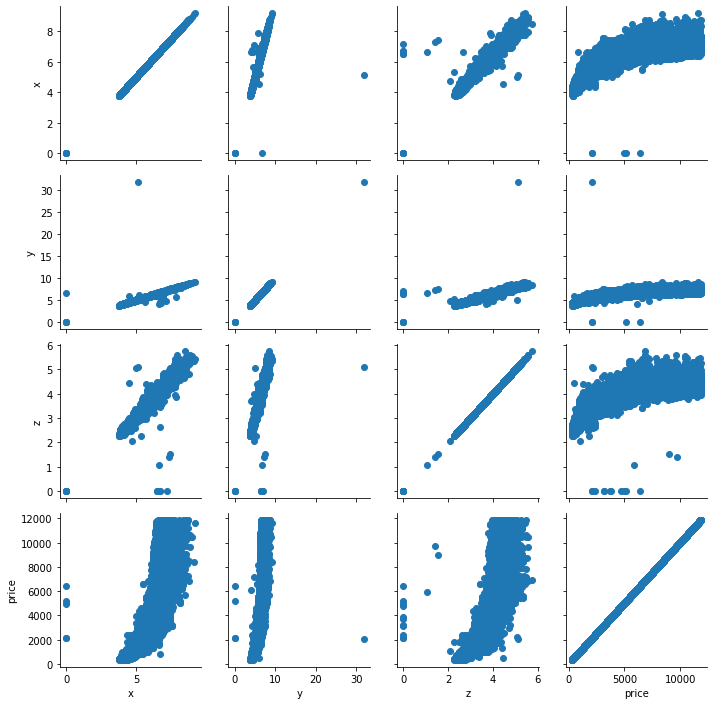

In [ ]:
# Relationship between target and x, y, z
plt.rcParams["figure.figsize"] = [15,8]
data = diamond[['x','y','z', 'price']]
g = sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

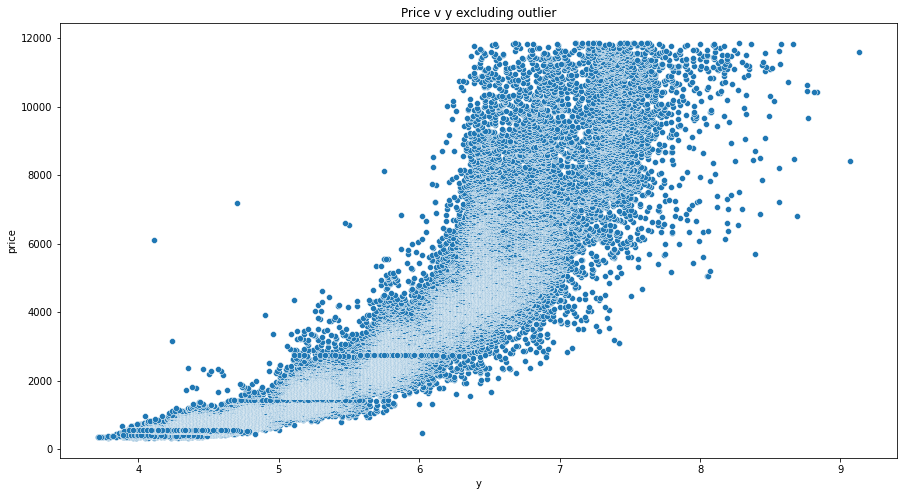

In [ ]:
#drop outlier at 60 on y column and y less than 2
diamond.drop(diamond.query("y>20").index, inplace = True)
diamond.drop(diamond.query("z<2").index, inplace = True)

# Relationship between target and y
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.y, diamond.price)
plt.title("Price v y excluding outlier")
plt.show()

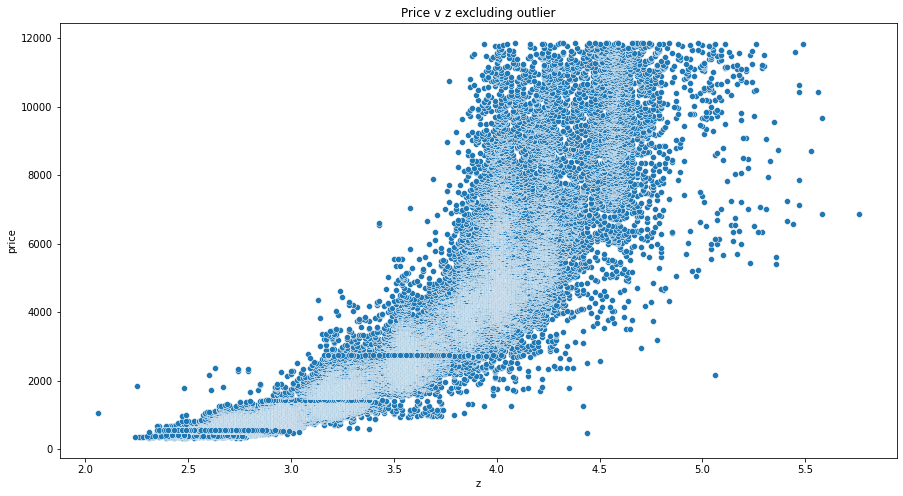

In [ ]:
# Relationship between target and z without outliers
plt.figure(figsize = (15,8))
sns.scatterplot(diamond.z, diamond.price)
plt.title("Price v z excluding outlier")
plt.show()

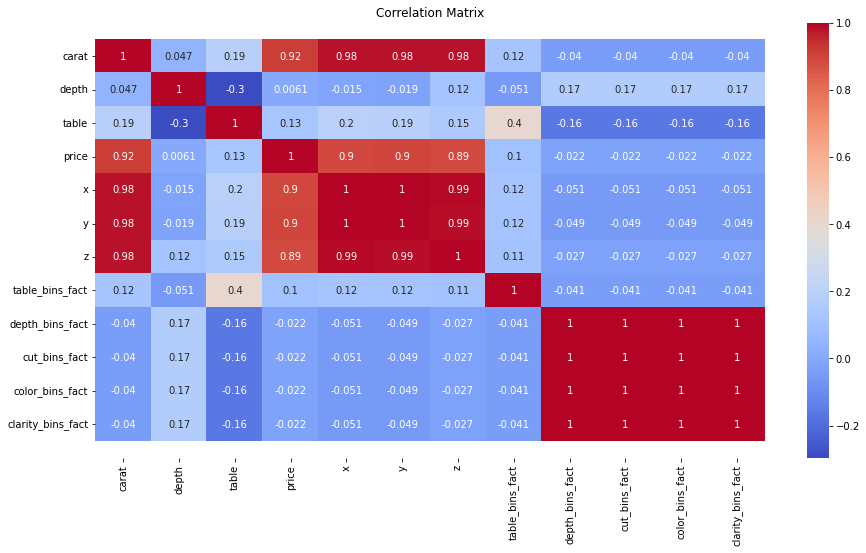

In [ ]:
# Factorise the categorical columns to calculate correlation
diamond["table_bins_fact"] = pd.factorize(diamond.table_bins)[0]
diamond["depth_bins_fact"] = pd.factorize(diamond.depth_bins)[0]
diamond["cut_bins_fact"] = pd.factorize(diamond.depth_bins)[0]
diamond["color_bins_fact"] = pd.factorize(diamond.depth_bins)[0]
diamond["clarity_bins_fact"] = pd.factorize(diamond.depth_bins)[0]

#calculate correlation
corr_values = diamond.corr()
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.heatmap(corr_values,annot=True, cmap = 'coolwarm')
ax.set_title('Correlation Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Notes** <br>Based on the above correlation matrix its evident that depth, cut, color and table have a very low corelation with price and hence add no value adde to prediction so i will remove these.  I will also remove y due to multi-collinearity with x thus information will be released by x variable. 

In [ ]:
#Save the new training data
train_data = diamond[['price', 'carat', 'x', 'z']]
train_data.to_csv('dataset/train_data.csv')



---



## 3. Feature Selection & Preperation

### 3.1 Train & Test split 

In [ ]:
X = train_data.drop('price', axis = 1)
y = train_data.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')



---



## 4. Model Training 

### 4.0 Model 1 - Linear Regression

In [ ]:
start_time = time.time()
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
end_time = time.time()
print(f"Linear Regression model accuracy is: {model1.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

Linear Regression model accuracy is: 0.841303498657225
Model Execution Time in Seconds:0.023


### 4.1 Model 2 - Support Vector Machines

In [ ]:
start_time = time.time()
from sklearn.svm import SVR
model2 = SVR(kernel='linear')
model2.fit(X_train, y_train)
end_time = time.time()
print(f"Linear Support Vector model accuracy is: {model2.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

Linear Support Vector model accuracy is: 0.7870702787561878
Model Execution Time in Seconds:71.572


### 4.2 Model 3 - KNN

In [ ]:
start_time = time.time()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(X_train, y_train)
end_time = time.time()
print(f"K-Nearest Neighbour model accuracy is: {model3.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

K-Nearest Neighbour model accuracy is: 0.8440917291838701
Model Execution Time in Seconds:0.025


### 4.3 Model 4 - DecisionTree

In [ ]:
start_time = time.time()
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state = 4)
model4.fit(X_train, y_train)
end_time = time.time()
print(f"DecisionTree model accuracy is: {model4.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

DecisionTree model accuracy is: 0.7566500495093534
Model Execution Time in Seconds:0.077


### 4.4 Model 5 - RandomForestTree



In [ ]:
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(random_state = 4, n_estimators=100)
model5.fit(X_train, y_train)
end_time = time.time()
print(f"RandomForest model accuracy is: {model5.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

RandomForest model accuracy is: 0.8320466731778188
Model Execution Time in Seconds:4.888


### 4.5 Model 6 - XGBoost

In [ ]:
start_time = time.time()
import xgboost as xgb
model6 = xgb.XGBRegressor(random_state = 4)
model6.fit(X_train, y_train)
model6.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost model accuracy is: {model6.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

[12:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model accuracy is: 0.8641202389980747
Model Execution Time in Seconds:2.071


### 4.6 Model 7 - Light XGBoost

In [ ]:
start_time = time.time()
import lightgbm as lgb
model7 = lgb.LGBMRegressor(random_state = 4)
model7.fit(X_train, y_train)
end_time = time.time()
model7.score(X_test, y_test)
print(f"Light XGBoost model accuracy is: {model7.score(X_test, y_test)}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

Light XGBoost model accuracy is: 0.8660241642359542
Model Execution Time in Seconds:0.285


**Notes** <br>
Light XGBoost Machines perform the best in testset by 2% compared to the nearest model which is KNN at 85% and also best at execution time. 

---



## 5. HyperTunning the Model

### 5.0 Assess the best train and test split %

In [ ]:
# test 4 split which produces the highest accuracy 
test = [0.2,0.3,0.4,0.5]
#loop through all test sizes and print the split % and accuracy
for _ in test:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=_, random_state=42)
  model7 = lgb.LGBMRegressor(random_state = 4)
  model7.fit(X_train, y_train)
  print(f"The score for {_} split is: {model7.score(X_test, y_test):.3f}")

The score for 0.2 split is: 0.866
The score for 0.3 split is: 0.867
The score for 0.4 split is: 0.866
The score for 0.5 split is: 0.867


In [ ]:
# It looks like there isnt much difference in accuracy. we will stick with 30% split as before.  

### 5.1 Hypertune the Model

In [ ]:
from sklearn.model_selection import GridSearchCV
model = lgb.LGBMRegressor(random_state = 42)
params = {'learning_rate':[0.01,0.05],'max_depth':[6],
              'min_child_weight': [0.001],
              'silent': [1],
              'subsample': [0.8,1],
              'colsample_bytree': [0.7,0.8,1], 
              'importance_type':['split', 'gain']}

CV = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error', cv=5)

#fit the model to training dataset
CV.fit(X_train, y_train)

#get the best parameters of the model
CV.best_params_

{'colsample_bytree': 1,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 0.001,
 'silent': 1,
 'subsample': 0.8}

In [ ]:
start_time = time.time()
model6 = lgb.LGBMRegressor(random_state = 42, importance_type='split',colsample_bytree= 1,learning_rate= 0.05,max_depth= 6,min_child_weight= 0.001, silent= 1,subsample= 0.8)
model6.fit(X_train, y_train)
model6.fit(X_train, y_train)
end_time = time.time()

print(f"Light XGBoost model accuracy is: {model6.score(X_test, y_test):.2f}")
print(f"Model Execution Time in Seconds:{end_time - start_time:.3f}")

Light XGBoost model accuracy is: 0.87
Model Execution Time in Seconds:0.536


## 6. Feature Importance

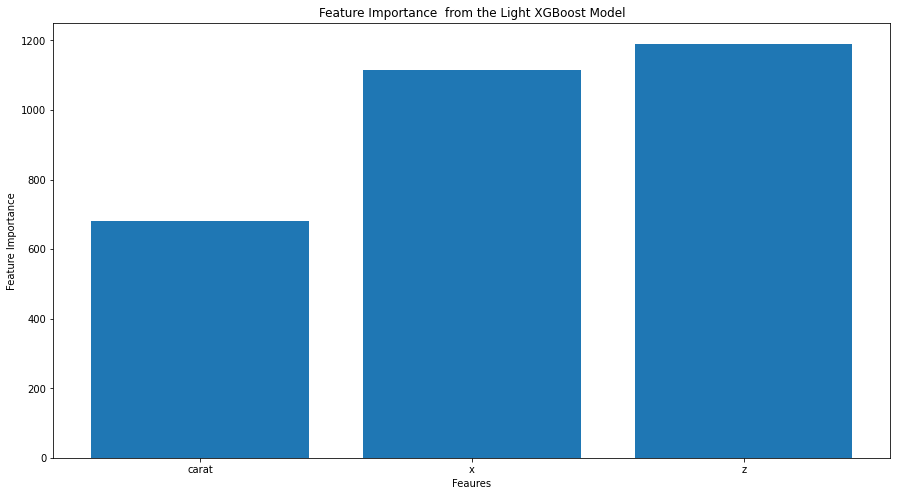

In [ ]:
#Plot the feature importance from the model - Feature importance show the number of times a feautre was used by the model
plt.xlabel('Feaures')
plt.ylabel('Feature Importance')
plt.title('Feature Importance  from the Light XGBoost Model')
plt.bar(X_train.columns, model6.feature_importances_)
plt.show()

## 7. Prediction on Test & Confidence Interval


In [ ]:
# predict the new hypertuned model on test dataset
from sklearn.metrics import mean_squared_error as mse
y_pred = model6.predict(X_test)
RMSE = np.sqrt(mse(y_test, y_pred))
RMSE

996.6380043141057

In [ ]:
y_train['prediction'] = y_pred
print(f"Light XGBoost model accuracy is: {model6.score(X_test, y_test):.2f}")

Light XGBoost model accuracy is: 0.87


In [ ]:
# calculate the 95% confidence interval of the model
sample_size = X_test.shape[0]
standard_error = RMSE * (np.sqrt(sample_size - 1)/(sample_size -2))
alpha = 1-(95/100)
critical_probability = 1-(alpha/2)
margin_error = (1 +critical_probability) * standard_error
print(f"There is 95% confidence that the model prediction is within {margin_error:.0f} of the price of diamond plus or minus")

There is 95% confidence that the model prediction is within 14 of the price of diamond plus or minus


## 8. Save Model 

In [ ]:
import pickle
# now you can save it to a file
with open('model/xgb_model.pkl', 'wb') as f:
    pickle.dump(model6, f)

## 9. Prediction on Validation set

In [ ]:
# create preprocessing functions for pipeline

# load the model back from pickle file
with open('model/xgb_model.pkl', 'rb') as f:
    model6 = pickle.load(f)

#Load the validation dataset
validation_set = pd.read_csv('dataset/validation_set.csv')

# remove the unwanted columns 
def create_ds(df):
  """Create prediction dataset from original dataset"""
  return df[['price', 'carat', 'x', 'z']]

# split X & Y
def split(df):
  """split X and y"""
  X = df.drop('price', axis = 1)
  y = df.price
  return X, y

validation_set = create_ds(validation_set)
validation_set = validation_set.dropna()
X, y = split(validation_set)

#make prediction 
y_pred_valid = model6.predict(X)
validation_set['predictions'] = y_pred_valid
print(f"Light XGBoost model accuracy on validation data  is: {model6.score(X_test, y_test):.2f}")

Light XGBoost model accuracy on validation data  is: 0.87


In [ ]:
# save the dataset with predictions
validation_set.to_csv('dataset/validation_with_prediction.csv')

## 10. Conclusion 
Exploratory analytics on the diamond dataset shows us that the best predictors of diamond price from this dataset is the number of carets and the size of the diamond. The rest of the variables such as cut, color, clarity and depth are merely too noisy and complicated for the average buyer of diamonds or we will require large amount of dataset to make sense.  The best performing model on the training data is the Light XGBoost which has been hypertuned to improve the accuracy to 87% final accuracy on validation dataset and the fastest in execution time. 
